# Create named function from an expression

This is not implemented inside `fun_expr`. Sometimes it is useful to have named functions that know about their name and can use this

Initialisations:

In [1]:
from sympy import *
init_printing()

import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format='retina'

import numpy as np

from IPython.display import display, Math, display_latex, Latex

from fun_expr import Function_from_Expression as FE

To create named functions, subclass FE:

In [68]:
class Named_Function_from_Expression(FE):
    """
    Create a named function from an expression.
    
    Example fo use:
    >>> from sympy import *
    >>> from fun_expr import (
            Function_from_Expression as FE,
            Named_Function_from_Expression as NFE,
            )
    >>> f = NFE("f", x, x**2)
    >>> f.displ()
    '$f(x) = x^{2}$'
    >>> f_1 = f.diff(x,name="f'")
    >>> f_1.displ()
    "$f'(x) = 2 x$"
    >>> f_1 = f.diff(x)
    '((x) \mapsto 2\,x)'
    >>> print(type(f_1))
    fun_expr.function_from_expression.Function_from_Expression
    >>> f.displ(2)
    '$f(2) = 4$'
    """
    
    def __new__(cls, name, variables, expr):
        obj = FE.__new__(cls, variables, expr)
        obj.name = name
        return obj
    
    def displ(self, *values, par="$", n=False, simplify=False, **kwargs):
        """
        This is a convenience function to display the equation 
        
          $f(x_1,x_2,...) = rhs$
          or 
          $$f(x_1,x_2,...) = rhs$$ # if par='$$'
          
        in latex-notation. 

        If values == (): replace rhs by self.expr
        instead. If values are specified, exactly one 
        value for every variable of this function is 
        expected.
        
        If n ist True, replace the rhs by rhs.n().
        If n is an integer number replace the rhs by rhs.n(n).
        
        If simplify is true, simplify rhs.
        
        Here rhs always is the right hand side of the equation.
        """
        
        # there are exactly two possibilities:
        #    either there is no value at all, values == ()
        #    or there are exactly len(self.variables) values.
        #    if there are no values, set rhs to self.expr
        #    else calculate rhs = f(*values)
        if values is not ():
            vals = values 
            rhs = super().__call__(*values, **kwargs) 
        else:
            vals = self.variables
            rhs = self.expr
        
        # n can be None, bool or int.
        # if n is None do nothing
        # if n is bool and n is True, replace rhs by rhs.n()
        # if n is bool and n is False, do nothing
        # if n is int replace rhs by rhs.n(n)
        if n is not None:
            if isinstance(n, bool):
                if n:
                    rhs = rhs.n()
            else:
                rhs = rhs.n(n)
        
        # simplify can be True or False
        # if simplfiy ist True, the rhs is simplified
        if simplify:
            rhs = rhs.simplify()
        
        # create output as 
        #    f(x_1,x_2,...) = rhs
        # in latex notation
        ret_val = par 
        ret_val += latex(self.name)
        ret_val += r"\left({vars}\right) = ".format(vars=','.join(latex(v) for v in vals))
        ret_val += latex(rhs) 
        ret_val += par
        return ret_val
    
    def diff(self, *symbols, **assumptions):
        """
        If a name is specified, as_function is set to True.
        In this case, a Named_Function_of_Expression is retured.
        If no name is specified, the result depends on as_function
        """
        name = assumptions.pop('name',None)
        as_function = assumptions.pop('as_function', True) or name is not None 
        # let my parent do the hard part 
        res = super().diff(*symbols, as_function=as_function, **assumptions)
        if name is not None:
            return Named_Function_from_Expression(name, res.variables, res.expr)
        else:
            return res
        
    def integrate(self, *args, **kwargs):
        """
        If a name is specified, as_function is set to True.
        In this case, a Named_Function_of_Expression is returned.
        If no name is specified, the result depends on as_function
        """
        name = kwargs.pop('name',None)
        as_function = kwargs.pop('as_function', False) or name is not None
        # let my parent do the hard part
        res = super().integrate(*args, as_function=as_function, **kwargs)
        if name is not None:
            return Named_Function_from_Expression(name, res.variables, res.expr)
        else:
            return res

Create a simple function to test `Named_Function_from_Expression`:

In [69]:
x = Symbol('x')
f = Named_Function_from_Expression("f",x,x**2)
f.displ()

'$f\\left(x\\right) = x^{2}$'

In [70]:
f.displ(par='$$')

'$$f\\left(x\\right) = x^{2}$$'

In [71]:
# to have nice output:
Math(f.displ())

<IPython.core.display.Math object>

In [72]:
display(f.displ(2))
Math(f.displ(2))

'$f\\left(2\\right) = 4$'

<IPython.core.display.Math object>

Plot the graph $y=f(x)$ for $-1 \le x \le 1$:

Text(0.5,1,'Graph of the square function $f\\left(x\\right) = x^{2}$')

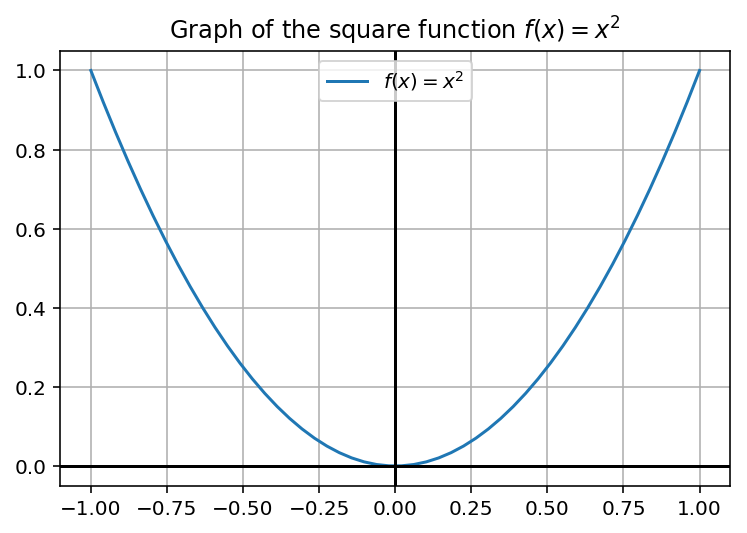

In [73]:
fig, ax = plt.subplots()

lx = np.linspace(-1,1)

ax.plot(lx,f.lambdified(lx),label=f.displ())
ax.axhline(0,c='k')
ax.axvline(0,c='k')
ax.grid(True)
ax.legend(loc='upper center')
ax.set_title("Graph of the square function {f}".format(f=f.displ()))

Determine the derivative of $f(x)$ as named function:

In [74]:
f_1 = f.diff(x,name="f'")
display(f_1.displ())
Math(f_1.displ())

"$f'\\left(x\\right) = 2 x$"

<IPython.core.display.Math object>

If no name is specified for `f.diff(x)`, a function of class `FE` is returned:

In [75]:
f_1 = f.diff(x)
display(f_1)
display(type(f_1))

fun_expr.function_from_expression.Function_from_Expression

If no name is specified for `f.diff(x)` and `is_function=False`, an expression is returned:

In [76]:
expr = f.diff(x,as_function=False)
display(expr)
type(expr)

sympy.core.mul.Mul

Integration leads to an expression, not to a function:

In [77]:
f_0 = f.integrate(x)
f_0

If `as_function=True` is set, the result is of type `FE`:

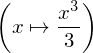

fun_expr.function_from_expression.Function_from_Expression

In [78]:
f_0 = f.integrate(x,as_function=True)
display(f_0)
display(type(f_0))

If a name is specified `as_function` is set to `True`, the result is of type `Named_Function_from_Expression`:

In [79]:
f_0 = f.integrate(x,name="f_0")
display(Math(f_0.displ()))
display(type(f_0))

<IPython.core.display.Math object>

__main__.Named_Function_from_Expression

In [80]:
f_0 = f.integrate(x,name='f_0',as_function=False)
display(Math(f_0.displ()))
type(f_0)

<IPython.core.display.Math object>

__main__.Named_Function_from_Expression

In [81]:
Math(f_0.displ(3))

<IPython.core.display.Math object>

Named functions of more then one variable are possible, too.

In [82]:
a,x,y,z = symbols('a,x,y,z')

g = Named_Function_from_Expression('g',(x,y,z), a*x*y*z)
Math(g.displ())

<IPython.core.display.Math object>

In [83]:
Math(g.diff(z,name=r"\frac{\partial}{\partial z}\,g").displ())

<IPython.core.display.Math object>

Names of functions can be latex expressions like `r'\mu'`:

In [84]:
mu = Named_Function_from_Expression(r'\mu', (x,y), x+y)
display(mu.displ())
Math(mu.displ())

'$\\mu\\left(x,y\\right) = x + y$'

<IPython.core.display.Math object>

Evaluation of a function works the expected way:

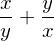

<IPython.core.display.Math object>

In [85]:
display(mu(x/y,y/x))
Math(mu.displ(x/y,y/x))

In [86]:
try:
    mu(1)
except TypeError as e:
    print("Error: " + str(e))

Error: Lambda((x, y), x + y) takes exactly 2 arguments (1 given)


In [87]:
try:
    mu.displ(1)
except TypeError as e:
    print("Error: " + str(e))

Error: Lambda((x, y), x + y) takes exactly 2 arguments (1 given)


In [88]:
try:
    mu.displ(1,2,3)
except TypeError as e:
    print("Error: " + str(e))

Error: Lambda((x, y), x + y) takes exactly 2 arguments (3 given)


In [89]:
try:
    mu.displ(1,2,3)
except TypeError as e:
    print("Error: " + str(e))

Error: Lambda((x, y), x + y) takes exactly 2 arguments (3 given)
